<a href="https://colab.research.google.com/github/parrisatwork/parrisatwork-Prediction-of-Product-Sale/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

- **Author:** Parris Trimingham

## **Project Overview**

## Data Dictionary

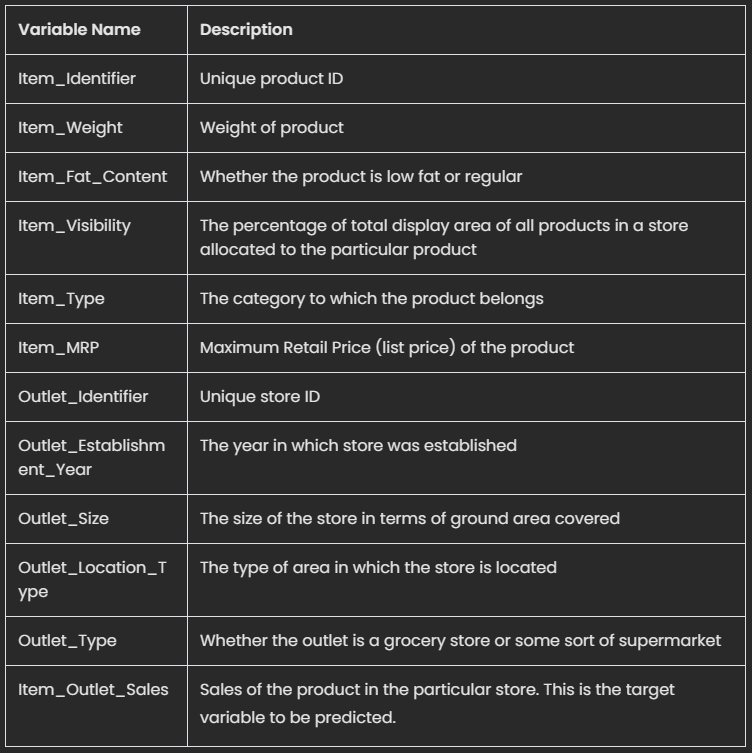

## **Imports**

In [1]:
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns
# MissingNo
import missingno as msno

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**


In [2]:
# Importing Data:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

In [3]:
# Gathering parameters:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean Data**


In [5]:
# Gathering parameters:
df.shape

(8523, 12)

- #### There are 8523 rows, and 12 columns.

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- #### All other data types are as they should be.

## Duplicated Data

In [7]:
# Let's search for duplicated data:
df.duplicated().sum()

0

There are no duplicated data to drop.

## Missing Data

In [8]:
# Let's search for missing data:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- #### Identifying of missing data yields Weight (1463) and Size (2410) have missing data. Let's identifiy the percentage that is missing.

In [9]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- #### Both Weight (17%) and Size (28%) have missing data and it would be best to drop these rows.

- **Missing 17.17% and 28.28% of values**
- **Strategy:**
 - Replace missing values with the median value of the column
- **Justification**
  - This is less affected by outliers than strategy = 'mean'.
  - However, for the Outlet_size, we can use the most frequented value.

In [10]:
# Define the Item_Weight Mean.
median_Weight = df['Item_Weight'].median()

In [11]:
## Replace the missing values with the column's 'median' value.
df['Item_Weight'].fillna(value = median_Weight, inplace = True)

In [12]:
# Let's check out the Item_Weight column for missing data.
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
## And we will fill in the missing Outlet_Size data with "Unknown"
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [14]:
# Now let's look for missing data.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- #### We can confirm that now, there is no missing data.

## Fixing Data Types

## Inspecting Categorical Columns & Addressing Inconsistent Values

- #### We will now address the data types and make sure that they match the data dictionary.

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
# Let's see what issues lie in the Item_Fat_Content label.
pd.set_option('display.max_rows', None)
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- #### Upon further investigating, "Item_Fat_Content" has inconsistant categories of data. Let's clean that up.

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

- #### And let's confirm it was changed.

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [20]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31    

- #### After further investigation of the categorical columns, there are zero inconsistencies with spelling or grammar of any categories.

## Summary Statistics for Numeric Features

In [21]:
# And here are the stats of the data we do have:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**


### Exploratory Visuals & Analysis

- #### To help illustrate the Production Sale data, we will produce visual aides in the form of charts.

 - Histogram to view the distributions of various features in your dataset.
 - Boxplot to view statistical summaries of various features in your dataset.
 - Heatmap of the correlation between features.

In [22]:
# Checking info again before we proceed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 - For each numeric feature, we will plot the distribution and a boxplot.

In [23]:
# Let's find out what those numeric featurs are:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [25]:
# Just gathering more data:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


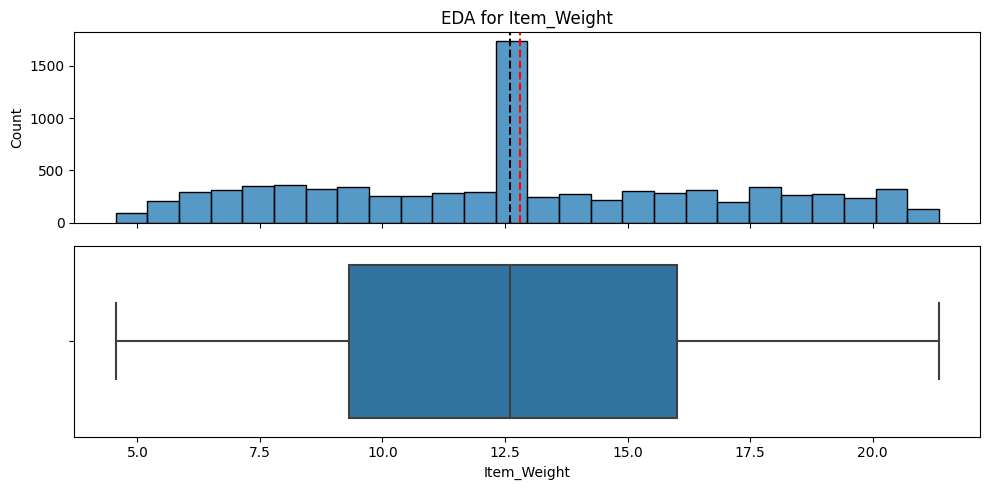

In [26]:
plot_numeric(df,'Item_Weight')

 - Look at that! Going over "Item Weight", we can see that both the Mean (12.81342) and the Median (12.60000) weights are about equal.

## **Exploratory Data Analysis**


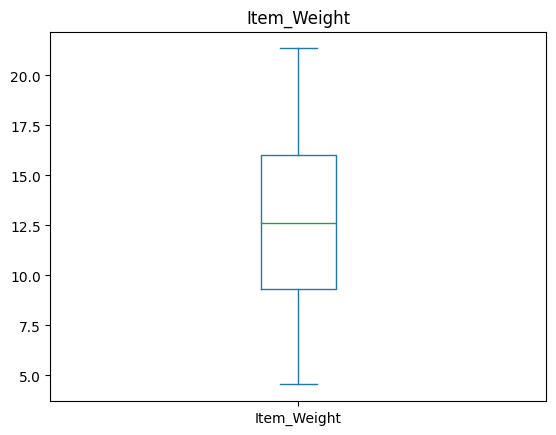

In [27]:
## Using kind='box'
ax = df['Item_Weight'].plot(kind='box')

## Set the Title
ax.set_title('Item_Weight');

<Axes: >

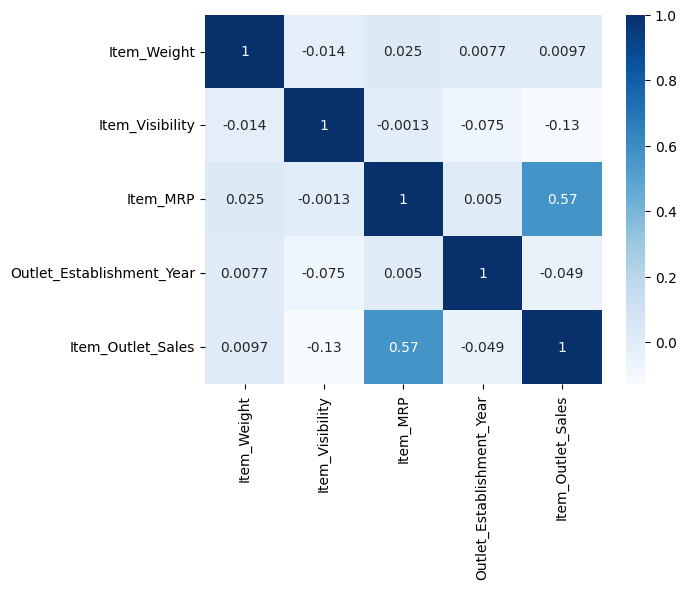

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

#### Since our end goal is to increase sales, let's produce a few charts that will help us to see the properties of products, and trends, that play a crucial role for the company.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Explanatory Data Analysis**

#### **Q1: Does MRP correlate to Sales?**
- What two variables can we use to visualize this data?
 - Item MRP vs Item Outlet Sales

#### **Q2: Does Fat Content increase or decrease sales?**
- What two variables can we use to visualize this data?
 - Item_Fat_Content vs Item Outlet Sales

#### **Q3: What is the trend for earnings for the last 3 years?**
- What two variables can we use to visualize this data?



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **Q1: Does MRP correlate to Sales?**

In [31]:
means = df.groupby('Item_Identifier')['Item_MRP'].mean().sort_values(ascending=False)
means

Item_Identifier
FDR25    265.468400
NCS29    265.455067
FDK51    265.416971
FDS13    265.302686
FDL58    263.956800
FDI15    263.938400
FDV49    263.855933
FDB15    263.813943
NCM05    263.622600
FDY14    263.547600
FDU12    263.445689
FDK40    263.219571
NCB31    263.091000
FDY02    263.019571
FDF05    262.891000
FDS56    262.608533
FDO09    262.391000
DRF37    262.374333
FDF39    262.316000
NCS06    262.191000
FDR59    262.071900
NCL06    261.892733
FDG47    261.808533
FDJ41    261.442733
FDP28    260.981100
FDN51    260.893600
FDS26    260.859400
DRM11    260.727800
FDT16    260.667800
FDU55    260.477800
NCQ29    260.227800
NCF06    259.296200
FDR09    259.181914
FDC02    259.144467
FDA04    259.008700
NCW30    258.746200
FDL57    258.730400
FDV33    258.380400
FDK46    258.295333
FDF04    258.117900
FDM21    257.744600
FDK28    257.664600
FDQ11    257.658800
FDD44    257.647933
FDY55    257.273800
FDB52    256.907200
NCG06    256.814600
FDG26    256.499667
FDT07    256.321889
FDA2

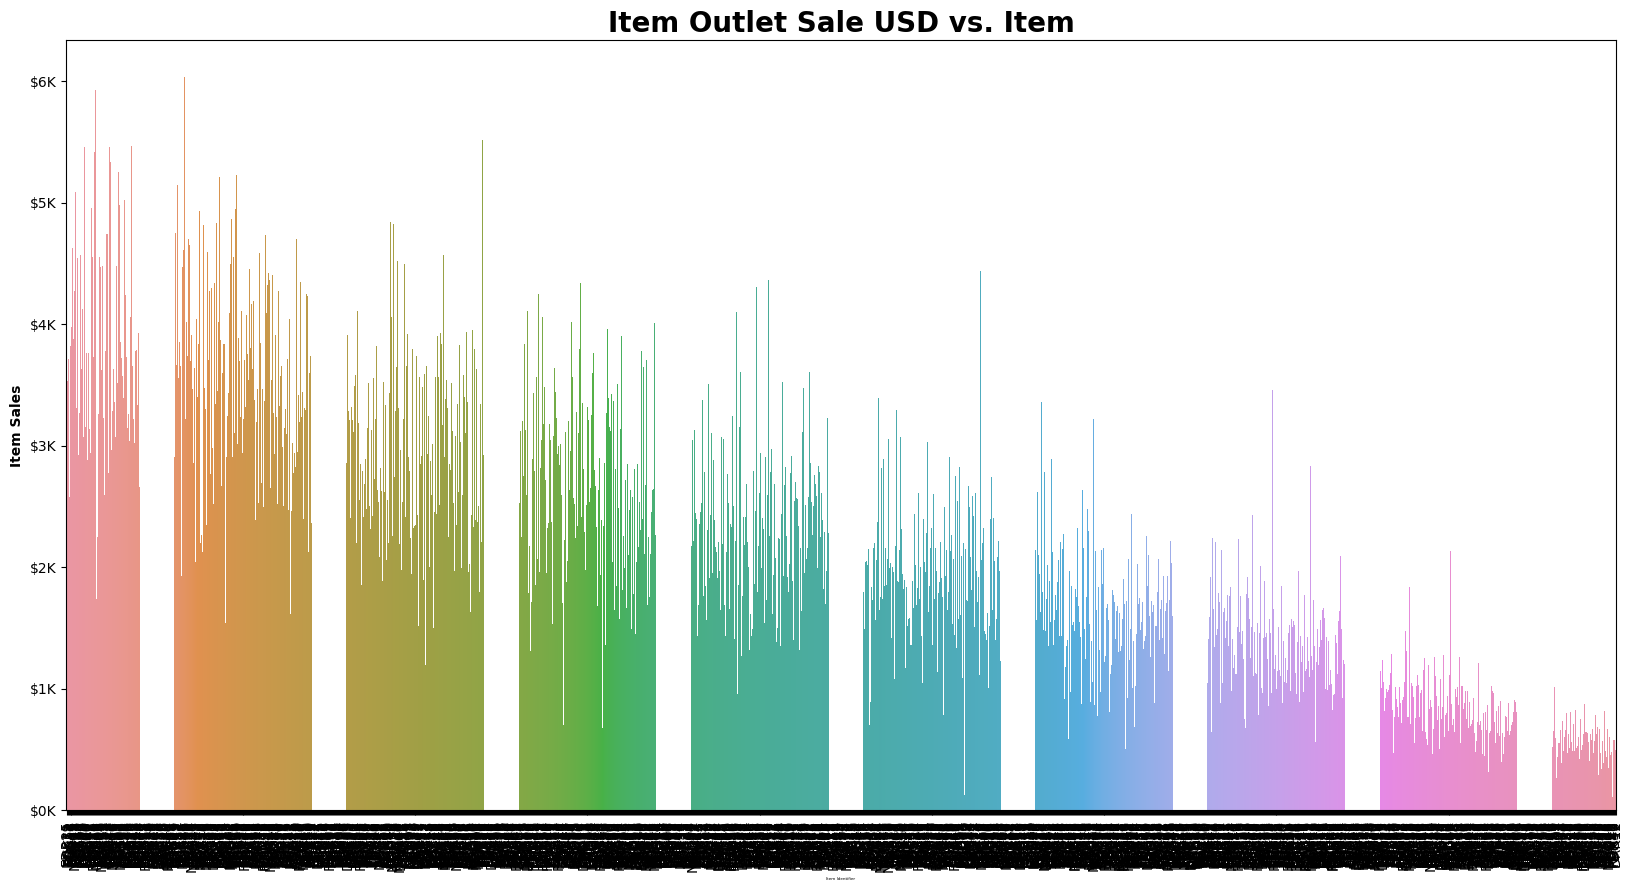

In [32]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Identifier', y = 'Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Item Outlet Sale USD vs. Item', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Identifier', fontsize = 3)
ax.set_ylabel('Item Sales', fontsize = 10, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

#### **Q2: Does Fat Content increase or decrease sales?**

In [33]:
means2 = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means2

Item_Fat_Content
Regular    2224.561170
Low Fat    2157.711534
Name: Item_Outlet_Sales, dtype: float64

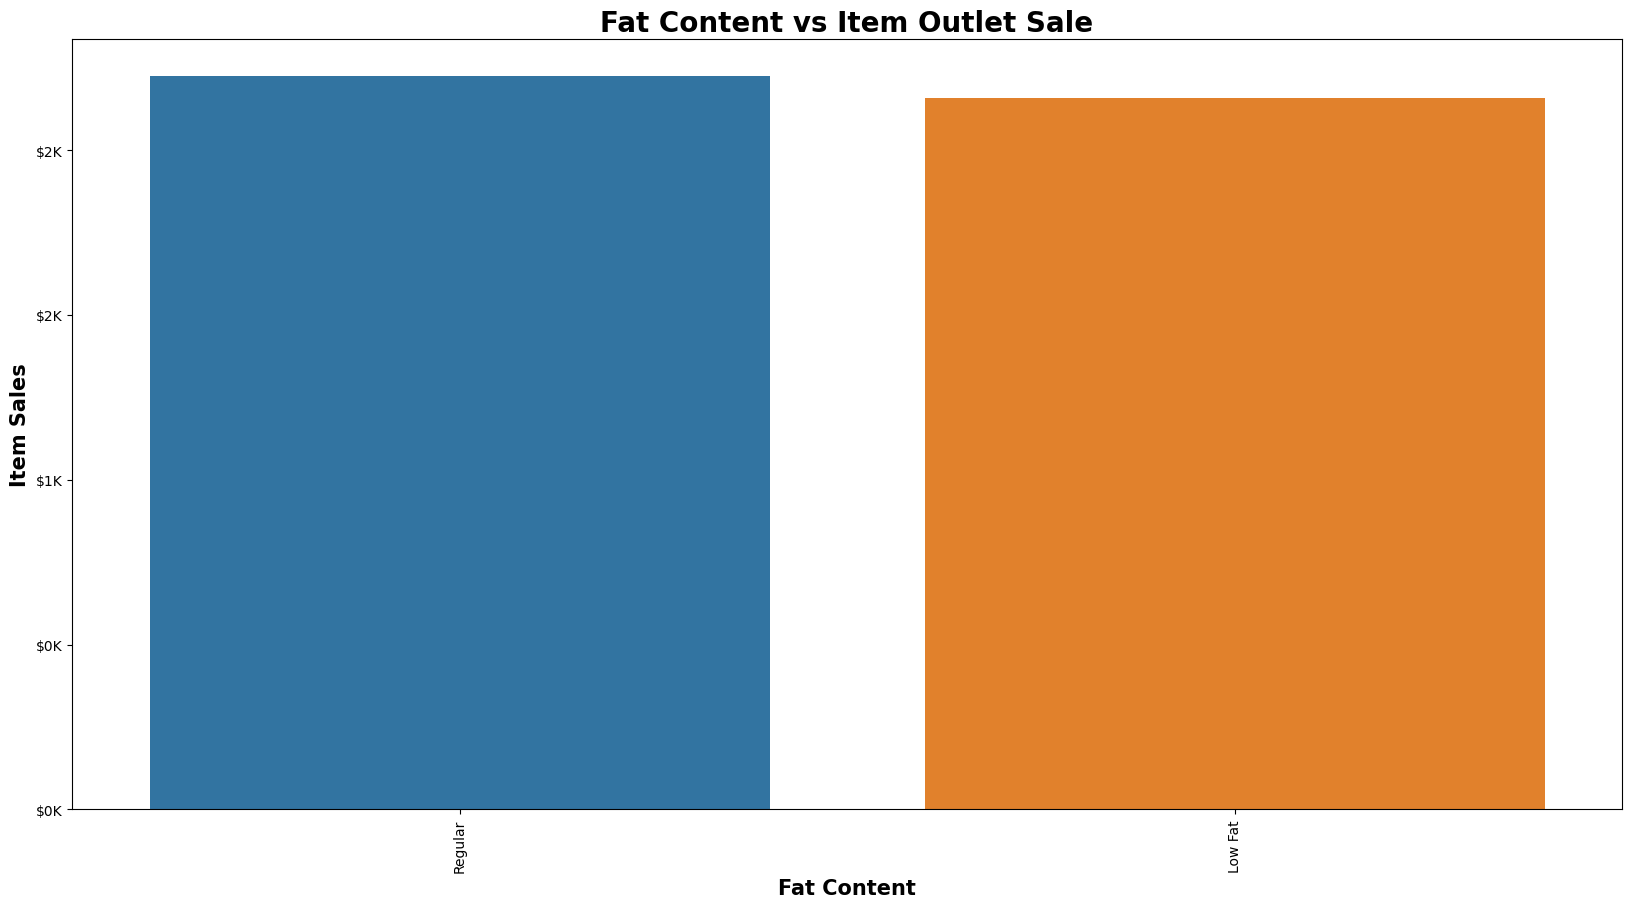

In [34]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Fat_Content', y = 'Item_Outlet_Sales', order = means2.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Fat Content vs Item Outlet Sale', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Fat Content', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

#### **Q3: What is the trend for earnings for the last 3 years?**

In [35]:
df['Item_Outlet_Sales'].value_counts()

958.7520      17
1342.2528     16
703.0848      15
1845.5976     15
1278.3360     14
1230.3984     14
1416.8224     13
539.2980      12
759.0120      12
1211.7560     12
575.2512      12
1438.1280     12
2109.2544     11
1537.9980     11
1406.1696     11
679.1160      11
2277.0360     11
639.1680      11
1701.7848     11
852.2240      11
1304.9680     11
1470.0864     10
2117.2440     10
1518.0240     10
2956.1520     10
918.8040      10
2348.9424     10
223.7088      10
452.7440      10
1677.8160     10
1006.6896     10
527.3136      10
2759.0752     10
3020.0688     10
1821.6288     10
2696.4900     10
1571.2880     10
3415.5540     10
2450.1440      9
755.0172       9
790.9704       9
1737.7380      9
447.4176       9
1298.3100      9
1225.0720      9
2013.3792      9
1565.9616      9
2302.3364      9
2157.1920      9
2684.5056      9
1693.7952      9
1869.5664      9
1757.7120      9
1713.7692      9
3691.1952      9
3435.5280      9
671.1264       9
1120.5414      8
2516.7240     

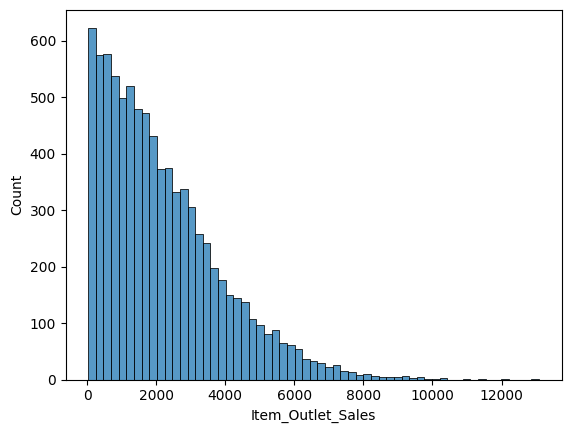

In [36]:
sns.histplot(data=df, x='Item_Outlet_Sales');

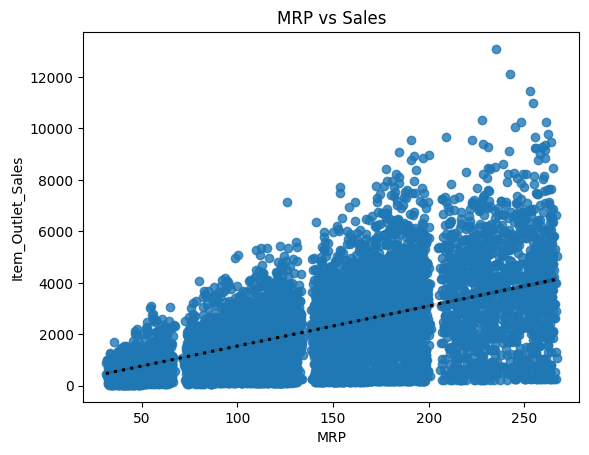

In [37]:
ax = sns.regplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', line_kws = {'color': 'black', 'ls': ':'});

## Set the Title
ax.set_title('MRP vs Sales')

## Set the X axis label
ax.set_xlabel('MRP');

### For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

#### You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

 - Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
 - Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
 - Perform a train test split
 - Create a preprocessing object to prepare the dataset for Machine Learning
 - Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

#### Imports

In [38]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [39]:
# Importing Data:
df2 = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

### Reloading the Data

In [40]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Performing Preprocessing Steps

 - We have no column to drop.

In [41]:
# Checking for Duplicates
df2.duplicated().sum()

0

 - We have no duplicates.

In [42]:
# Checking missing values
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
# Redoing what was done far above.
i_mean = np.mean(df["Item_Weight"])
# replacing missing values with Item_Weight average
df['Item_Weight'].fillna(value = i_mean, inplace = True)
# filling in missing data in the Outlet_Size solumn
df['Outlet_Size'].fillna(value = "Unknown", inplace = True)
# double checking to see if the missing data has been filled in Outlet_Size
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Defining X and y

In [45]:
## Define X and y
target = 'Item_Outlet_Sales'

X = df2.drop(columns=target).copy()
y = df2[target].copy()
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


#### Train-Test-Split

In [46]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### Making a Preprocessing Pipeline

In [47]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [48]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [49]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [50]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [51]:
# Creating scaler object to scale the data
scaler = StandardScaler()

In [52]:
## test num_pipe (optional)
scaler.fit_transform(X_train[num_selector(X_train)])

array([[ 0.74311896, -0.71277507,  1.82810922,  1.32784893],
       [ 0.50587592, -1.29105225,  0.60336888,  1.32784893],
       [-0.11958298,  1.81331864,  0.24454056,  0.13618724],
       ...,
       [ 1.01271331, -0.92052713,  1.52302674,  0.49368575],
       [ 1.60582089, -0.2277552 , -0.38377708,  1.0895166 ],
       [ 0.74311896, -0.95867683, -0.73836105, -0.10214509]])

In [53]:
## Combine into 1 column transformer
preprocessor = make_column_transformer((cat_pipe,cat_selector),
                                       (scaler,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc7adb7c790>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc7adb85790>)])

In [54]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ..., -0.71277507,
         1.82810922,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ..., -1.29105225,
         0.60336888,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ...,  1.81331864,
         0.24454056,  0.13618724],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.92052713,
         1.52302674,  0.49368575],
       [ 0.        ,  0.        ,  0.        , ..., -0.2277552 ,
        -0.38377708,  1.0895166 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.95867683,
        -0.73836105, -0.10214509]])

In [55]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer